In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


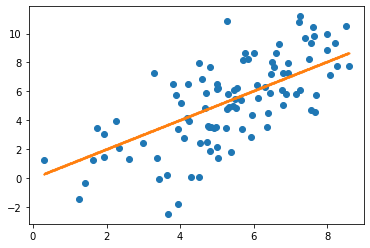

In [2]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=100,scale=X_var)
Y = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(X.min(),X.max(),1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

plt.show()



In [24]:
trial_num = 100 #試行回数
result = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

for _ in tqdm(range(trial_num)):
    s = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 250 # データセットのサンプル数
    b = 2.2 # ノイズの分散
    # 初期値wの決定
    w = (c - (-c)) * np.random.rand() + (-c) + w_star
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        s.append(tmp)
        loss_store.append(son.f(y=X_mean,x=X_mean,w=tmp))

    result.append(np.array(s))
    result_loss.append(np.array(loss_store))

result = np.array(result)
result_loss = np.array(result_loss)





  0%|          | 0/100 [00:00<?, ?it/s]

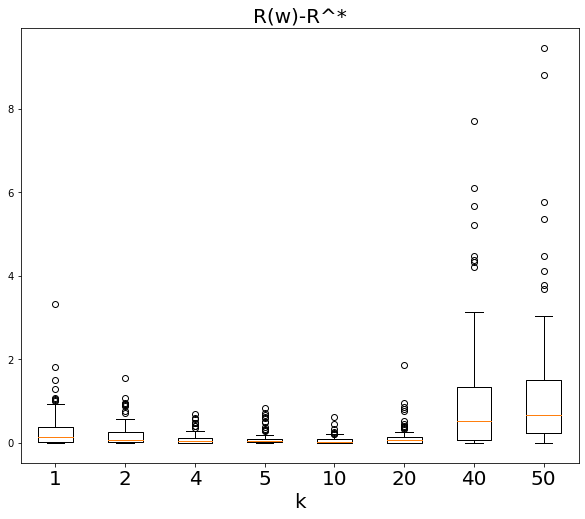

In [25]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss[:,[0,1,3,4,9,19,39,49],0])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [26]:
df = pd.DataFrame(result_loss[:,[0,1,3,4,9,19,39,49],0],columns=columns)

In [27]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.317755,0.201212,1.049308e-01,0.108330,0.066523,0.142281,1.082330,1.233924
std,0.473811,0.289965,1.439957e-01,0.166969,0.097874,0.252880,1.493959,1.635780
min,0.000055,0.000003,3.858510e-09,0.000228,0.000008,0.000041,0.000014,0.001258
25%,0.035016,0.014963,1.127690e-02,0.014778,0.006351,0.012534,0.082562,0.233408
50%,0.134181,0.072864,5.142678e-02,0.049972,0.032221,0.071786,0.521895,0.668141
75%,0.395062,0.275694,1.293770e-01,0.108380,0.086729,0.138123,1.334405,1.516171
max,3.325857,1.547399,7.067191e-01,0.849221,0.634099,1.868010,7.705959,9.462383


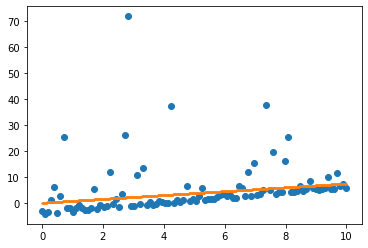

In [28]:
# データ生成デモ Log-normal
X = np.linspace(0,10,100)
np.random.shuffle(X)
Y = noise.LogNormal(sigma=1.75,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)



In [29]:
trial_num = 100 #試行回数
result = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

for _ in tqdm(range(trial_num)):
    s = []
    loss_store = []
    a = 0.01
    c = 5
    n = 250
    b = 1.75
    # 初期値wの決定
    w = (c - (-c)) * np.random.rand() + (-c) + w_star
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []


        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        s.append(tmp)
        loss_store.append(son.f(y=X.mean(),x=X.mean(),w=tmp))

    result.append(np.array(s))
    result_loss.append(np.array(loss_store))

result = np.array(result)
result_loss = np.array(result_loss)





  0%|          | 0/100 [00:00<?, ?it/s]

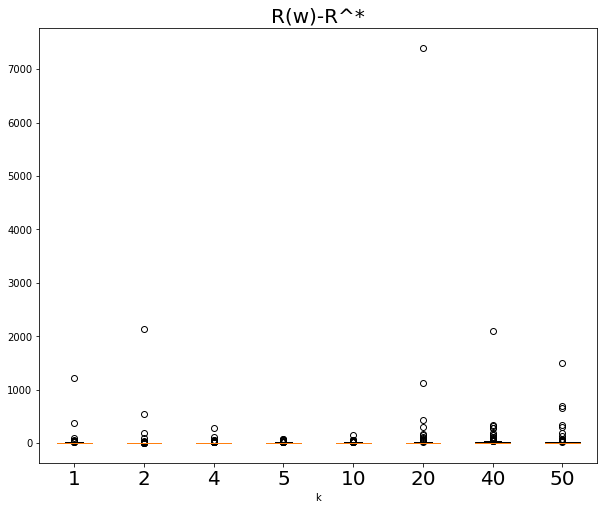

In [30]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss[:,[0,1,3,4,9,19,39,49],0])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k')

plt.show()

In [31]:
df = pd.DataFrame(result_loss[:,[0,1,3,4,9,19,39,49],0],columns=columns)

In [32]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,22.094036,32.648887,8.130141,7.252263,8.379197,104.550562,49.160566,46.377670
std,127.129044,219.690702,29.947386,16.312291,18.537078,747.709776,216.699018,180.129474
min,0.000058,0.002738,0.000061,0.000445,0.001532,0.003519,0.000636,0.001896
25%,0.835566,0.426166,0.429292,0.442491,0.251455,0.482361,0.879658,0.450356
50%,2.292644,1.101752,1.068965,1.289848,1.389597,2.422565,4.200749,1.860799
75%,6.091561,2.975534,4.179782,5.061726,7.385552,9.295953,16.992427,11.515613
max,1217.668870,2129.776035,272.417372,82.352848,146.065557,7402.791064,2095.297732,1491.317021


In [8]:
A = np.arange(2).reshape(1,2)

In [11]:
np.dot(np.array([1,2]),A.T )

array([2])